# Análise por grupos

Nessa aba será analizado a distribuição de vacinas entre os grupos prioritários

In [25]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
data_ = pd.read_csv('vacinados.csv', encoding = "UTF-8", sep=";")

#remoção de colunas indesejadas
dt = data_.drop(columns=['cpf','nome','sexo','vacina','lote','data_vacinacao','local_vacinacao',])

#remoção de valores ausentes
data = dt.dropna()
data

,grupo,dose
0,TRABALHADORES INDUSTRIAIS E BANCÁRIOS,2.0
1,TRABALHADORES INDUSTRIAIS E BANCÁRIOS,1.0
2,TRABALHADORES DA SAÚDE,2.0
3,TRABALHADORES DA SAÚDE,1.0
4,TRABALHADORES DA SAÚDE,3.0
...,...,...
3407292,IDOSOS,1.0
3407293,IDOSOS,3.0
3407294,IDOSOS,2.0
3407295,IDOSOS,3.0


Separando em dois grupo comum e grupos prioritários para realizar a comparação de vacinas tomadas 

In [26]:
grupo_comum_total = (data['grupo'] != 'IDOSOS')&(data['grupo'] != 'PESSOAS COM DEFICIÊNCIA - 12 A 17 ANOS')&(data['grupo'] != 'CRIANÇAS DE 05 A 11 ANOS - Síndrome de Down')&(data['grupo'] != 'SESAU - BUSCA ATIVA')&(data['grupo'] != 'TRABALHADORES DA SAÚDE')&(data['grupo'] != 'TRABALHADORES DA LIMPEZA URBANA')&(data['grupo'] != 'TRABALHADORES DA EDUCAÇÃO')&(data['grupo'] != 'TRABALHADORES INDUSTRIAIS E BANCÁRIOS')&(data['grupo'] != 'GESTANTES E PUÉRPERAS')&(data['grupo'] != 'GESTANTES E PUÉRPERAS - 12 A 17 ANOS')&(data['grupo'] != 'GESTANTES E PUÉRPERAS NÃO RESIDENTES EM RECIFE')&(data['grupo'] != 'OUTRAS PRIORIDADES')&(data['grupo'] != 'PESSOAS COM COMORBIDADES')&(data['grupo'] != 'PESSOAS EM SITUAÇÃO DE RUA')&(data['grupo'] != 'CAMINHONEIROS')&(data['grupo'] != 'TRABALHADORES DE TRANSPORTE AÉREO')&(data['grupo'] != 'TRABALHADORES DA ASSISTÊNCIA SOCIAL')&(data['grupo'] != 'TRABALHADORES PORTUÁRIOS')&(data['grupo'] != 'TRABALHADORES DE TRANSPORTE METROVIÁRIO E FERROVIÁRIO')&(data['grupo'] != 'TRABALHADORES DE TRANSPORTE COLETIVO RODOVIÁRIO')&(data['grupo'] != 'TRABALHADORES DE TRANSPORTE AQUAVIÁRIO')&(data['grupo'] != 'CRIANÇAS DE 05 A 11 ANOS - Prioritárias')&(data['grupo'] != 'PESSOAS COM COMORBIDADES - 12 A 17 ANOS')&(data['grupo'] != 'PESSOAS COM VIAGEM PARA EXTERIOR (ESTUDO/PESQUISA/TRABALHO/TRATAMENTO DE SAÚDE)')
grupo_prioritario_total = (data['grupo']!='PÚBLICO EM GERAL (18 a 59 anos)') & (data['grupo']!='CRIANÇAS DE 05 A 11 ANOS') & (data['grupo']!='CRIANÇAS DE 03 E 04 ANOS') & (data['grupo']!='PÚBLICO EM GERAL - MENOR DE 18 ANOS')

Gráfico de "pizza" para melhor visualização da vacinação de grupos comuns x grupos prioritários

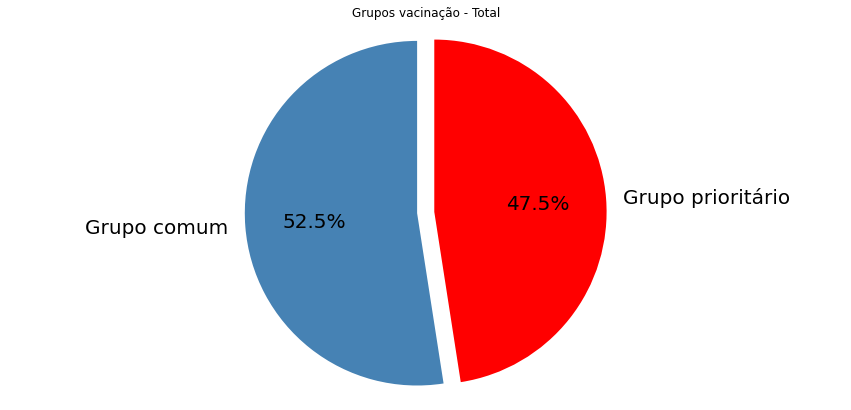

Número de vacinas tomadas pelo grupo comum: 1871486
Número de vacinas tomadas pelo grupo prioritário: 1696331


In [27]:
qtdgrupo_comum = data[grupo_comum_total].count()[0]
qtdgrupo_prioritario = data[grupo_prioritario_total].count()[0]

valores = [qtdgrupo_comum, qtdgrupo_prioritario]
rotulos = ['Grupo comum','Grupo prioritário']

fig1, ax2 = plt.subplots(figsize=(15, 7))
plt.rcParams['xtick.labelsize'] = 20
wedges, texts, autotexts = ax2.pie(x=valores, labels=rotulos, autopct='%1.1f%%', shadow=False, startangle=90, colors = ['steelblue', 'red'], explode=(0.05, 0.05))
plt.setp(autotexts,size=20)
plt.title('Grupos vacinação - Total')
ax2.axis('equal')
plt.show()
print(f'Número de vacinas tomadas pelo grupo comum: {qtdgrupo_comum}')
print(f'Número de vacinas tomadas pelo grupo prioritário: {qtdgrupo_prioritario}')

Analisando o gráfico, entende-se que o grupo que mais tomou vacina foi o comum.

Divisão dos grupos prioritários em doses

In [28]:
grupo_prioritario_1dose = (data['grupo']!='PÚBLICO EM GERAL (18 a 59 anos)') & (data['grupo']!='CRIANÇAS DE 05 A 11 ANOS') & (data['grupo']!='CRIANÇAS DE 03 E 04 ANOS') & (data['grupo']!='PÚBLICO EM GERAL - MENOR DE 18 ANOS')&(data['dose'] == 1)
grupo_prioritario_2dose = (data['grupo']!='PÚBLICO EM GERAL (18 a 59 anos)') & (data['grupo']!='CRIANÇAS DE 05 A 11 ANOS') & (data['grupo']!='CRIANÇAS DE 03 E 04 ANOS') & (data['grupo']!='PÚBLICO EM GERAL - MENOR DE 18 ANOS')&(data['dose'] == 2)
grupo_prioritario_3dose = (data['grupo']!='PÚBLICO EM GERAL (18 a 59 anos)') & (data['grupo']!='CRIANÇAS DE 05 A 11 ANOS') & (data['grupo']!='CRIANÇAS DE 03 E 04 ANOS') & (data['grupo']!='PÚBLICO EM GERAL - MENOR DE 18 ANOS')&(data['dose'] == 3)
grupo_prioritario_4dose = (data['grupo']!='PÚBLICO EM GERAL (18 a 59 anos)') & (data['grupo']!='CRIANÇAS DE 05 A 11 ANOS') & (data['grupo']!='CRIANÇAS DE 03 E 04 ANOS') & (data['grupo']!='PÚBLICO EM GERAL - MENOR DE 18 ANOS')&(data['dose'] == 4)

Gráfico em barra mostrando a diferença do número de vacinas tomadas, onde a quarta dose foi a menos tomada

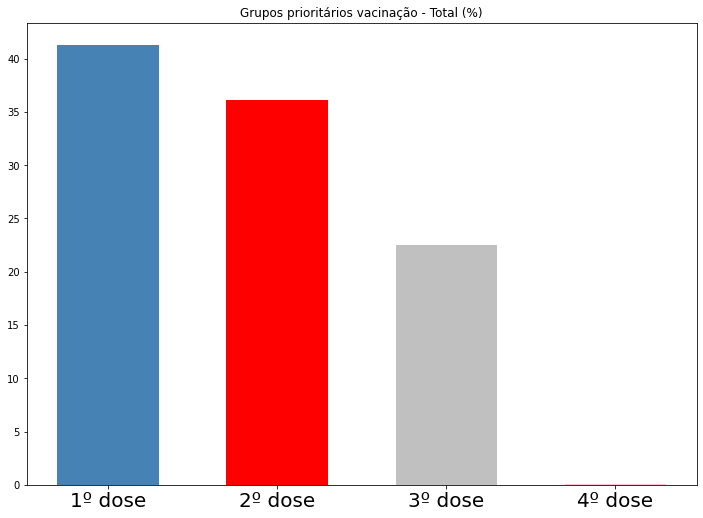

Quantidade de vacinas da 1ª dose tomadas pelos grupos prioritários: 700809 - 41.31%
Quantidade de vacinas da 2ª dose tomadas pelos grupos prioritários: 612819 - 36.13%
Quantidade de vacinas da 3ª dose tomadas pelos grupos prioritários: 381774 - 22.51%
Quantidade de vacinas da 4ª dose tomadas pelos grupos prioritários: 929 - 0.05%


In [29]:
#número de vacinas tomadas divido por doses
qtdprioritario_1dose = (data[grupo_prioritario_1dose].count()[0])
qtdprioritario_2dose = (data[grupo_prioritario_2dose].count()[0])
qtdprioritario_3dose = (data[grupo_prioritario_3dose].count()[0])
qtdprioritario_4dose = (data[grupo_prioritario_4dose].count()[0])
#quantidade em porcetagem com limite de duas casas decimais
qtdprioritario_1dose_porcentagem = round(((data[grupo_prioritario_1dose].count()[0])/qtdgrupo_prioritario)*100, 2)
qtdprioritario_2dose_porcentagem = round(((data[grupo_prioritario_2dose].count()[0])/qtdgrupo_prioritario)*100, 2)
qtdprioritario_3dose_porcentagem = round(((data[grupo_prioritario_3dose].count()[0])/qtdgrupo_prioritario)*100, 2)
qtdprioritario_4dose_porcentagem = round(((data[grupo_prioritario_4dose].count()[0])/qtdgrupo_prioritario)*100, 2)

height = [qtdprioritario_1dose_porcentagem, qtdprioritario_2dose_porcentagem, qtdprioritario_3dose_porcentagem, qtdprioritario_4dose_porcentagem]
bars = ('1º dose', '2º dose', '3º dose', '4º dose')

x_pos = np.arange(len(bars))
fig, ax = plt.subplots(figsize=(12, 8.5))
plt.bar(x_pos, height, color=['steelblue', 'red', 'silver', 'pink'], width = 0.6)
plt.rcParams['xtick.labelsize'] = 20
plt.title('Grupos prioritários vacinação - Total (%)')
plt.xticks(x_pos, bars)
plt.show() 
print(f'Quantidade de vacinas da 1ª dose tomadas pelos grupos prioritários: {qtdprioritario_1dose} - {qtdprioritario_1dose_porcentagem}%')
print(f'Quantidade de vacinas da 2ª dose tomadas pelos grupos prioritários: {qtdprioritario_2dose} - {qtdprioritario_2dose_porcentagem}%')
print(f'Quantidade de vacinas da 3ª dose tomadas pelos grupos prioritários: {qtdprioritario_3dose} - {qtdprioritario_3dose_porcentagem}%')
print(f'Quantidade de vacinas da 4ª dose tomadas pelos grupos prioritários: {qtdprioritario_4dose} - {qtdprioritario_4dose_porcentagem}%')

A partir do gráfico em barras percebe-se a grande variação no número de vacinas aplicadas entre as doses. 

Divisão dos 5 grupos prioritários que mais tomaram vacinas e o restante dos grupos classificados como "outros" - 1ª dose

In [30]:
idosos_1dose = (data['grupo'] == 'IDOSOS')&(data['dose'] == 1)
trabalhores_saude_1dose = (data['grupo'] == 'TRABALHADORES DA SAÚDE')&(data['dose'] == 1)
pessosas_comorbidade_1dose = (data['grupo'] == 'PESSOAS COM COMORBIDADES')&(data['dose'] == 1)
trabalhores_educacao_1dose = (data['grupo'] == 'TRABALHADORES DA EDUCAÇÃO')&(data['dose'] == 1)
gestantes_e_puerperas_1dose = (data['grupo'] == 'GESTANTES E PUÉRPERAS')&(data['dose'] == 1)
outros_1dose = (data['grupo'] != 'IDOSOS')&(data['grupo'] != 'TRABALHADORES DA SAÚDE')&(data['grupo'] != 'PESSOAS COM COMORBIDADES')&(data['grupo'] != 'TRABALHADORES DA EDUCAÇÃO')&(data['grupo'] != 'GESTANTES E PUÉRPERAS')&(data['grupo']!='PÚBLICO EM GERAL (18 a 59 anos)') & (data['grupo']!='CRIANÇAS DE 05 A 11 ANOS') & (data['grupo']!='CRIANÇAS DE 03 E 04 ANOS') & (data['grupo']!='PÚBLICO EM GERAL - MENOR DE 18 ANOS')&(data['dose'] == 1)

Gráfico em pizza mostrando, em porcetagem, a quantidade de vacinas tomadas por grupos na primeira dose

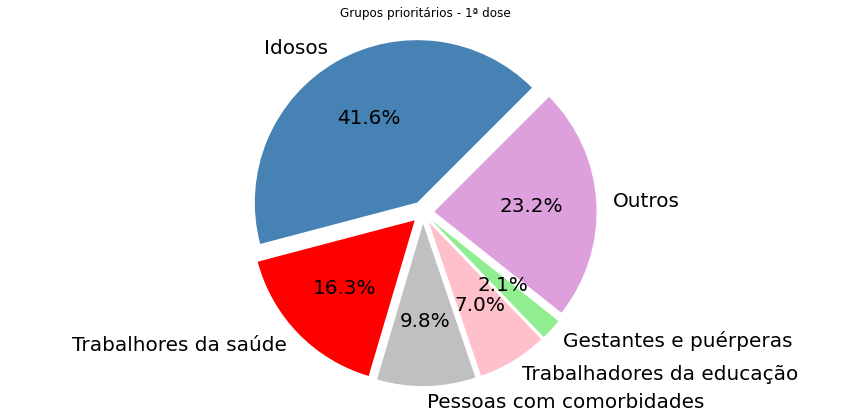

Número de vacinas aplicadas em idosos na primeira dose: 291578
Número de vacinas aplicadas em trabalhadores da saúde na primeira dose: 114349
Número de vacinas aplicadas em pessoas com comorbidades na primeira dose: 68641
Número de vacinas aplicadas em trabalhadores da educação na primeira dose: 48843
Número de vacinas aplicadas em gestantes e puérperas na primeira dose: 14950
Número de vacinas aplicadas em outros grupos prioritários na primeira dose: 162448


In [31]:
qtdidosos_1dose = data[idosos_1dose].count()[0]
qtdtrabalhores_saude_1dose = data[trabalhores_saude_1dose].count()[0]
qtdpessosas_comorbidade_1dose = data[pessosas_comorbidade_1dose].count()[0]
qtdtrabalhores_educacao_1dose = data[trabalhores_educacao_1dose].count()[0]
qtdgestantes_e_puerperas_1dose = data[gestantes_e_puerperas_1dose].count()[0]
qtdoutros_1dose = data[outros_1dose].count()[0]

valores = [qtdidosos_1dose, qtdtrabalhores_saude_1dose, qtdpessosas_comorbidade_1dose, qtdtrabalhores_educacao_1dose, qtdgestantes_e_puerperas_1dose, qtdoutros_1dose]
rotulos = ['Idosos','Trabalhores da saúde', 'Pessoas com comorbidades', 'Trabalhadores da educação', 'Gestantes e puérperas', 'Outros']

fig1, ax2 = plt.subplots(figsize=(15, 7))
plt.rcParams['xtick.labelsize'] = 20
wedges, texts, autotexts = ax2.pie(x=valores, labels=rotulos, autopct='%1.1f%%', shadow=False, startangle=45, colors = ['steelblue', 'red', 'silver', 'pink', 'lightgreen', 'plum'], explode=(0.07, 0.07, 0.07, 0.07, 0.07, 0.07))
plt.setp(autotexts,size=20)
plt.title('Grupos prioritários - 1ª dose')
ax2.axis('equal')
plt.show()
print(f'Número de vacinas aplicadas em idosos na primeira dose: {qtdidosos_1dose}')
print(f'Número de vacinas aplicadas em trabalhadores da saúde na primeira dose: {qtdtrabalhores_saude_1dose}')
print(f'Número de vacinas aplicadas em pessoas com comorbidades na primeira dose: {qtdpessosas_comorbidade_1dose}')
print(f'Número de vacinas aplicadas em trabalhadores da educação na primeira dose: {qtdtrabalhores_educacao_1dose}')
print(f'Número de vacinas aplicadas em gestantes e puérperas na primeira dose: {qtdgestantes_e_puerperas_1dose}')
print(f'Número de vacinas aplicadas em outros grupos prioritários na primeira dose: {qtdoutros_1dose}')

Na primeira dose, o grupo dos idosos foi o que mais tomou vacina dentre os grupos prioritários, vindo em segundo lugar o dos trabalhadores da saúde e terceiro pessoas com comorbidades. 

Divisão dos 5 grupos prioritários que mais tomaram vacinas e o restante dos grupos classificados como "outros" - 2ª dose

In [32]:
idosos_2dose = (data['grupo'] == 'IDOSOS')&(data['dose'] == 2)
trabalhores_saude_2dose = (data['grupo'] == 'TRABALHADORES DA SAÚDE')&(data['dose'] == 2)
pessosas_comorbidade_2dose = (data['grupo'] == 'PESSOAS COM COMORBIDADES')&(data['dose'] == 2)
trabalhores_educacao_2dose = (data['grupo'] == 'TRABALHADORES DA EDUCAÇÃO')&(data['dose'] == 2)
gestantes_e_puerperas_2dose = (data['grupo'] == 'GESTANTES E PUÉRPERAS')&(data['dose'] == 2)
outros_2dose = (data['grupo'] != 'IDOSOS')&(data['grupo'] != 'TRABALHADORES DA SAÚDE')&(data['grupo'] != 'PESSOAS COM COMORBIDADES')&(data['grupo'] != 'TRABALHADORES DA EDUCAÇÃO')&(data['grupo'] != 'GESTANTES E PUÉRPERAS')&(data['grupo']!='PÚBLICO EM GERAL (18 a 59 anos)') & (data['grupo']!='CRIANÇAS DE 05 A 11 ANOS') & (data['grupo']!='CRIANÇAS DE 03 E 04 ANOS') & (data['grupo']!='PÚBLICO EM GERAL - MENOR DE 18 ANOS')&(data['dose'] == 2)

Gráfico em pizza mostrando, em porcetagem, a quantidade de vacinas tomadas por grupos na segunda dose

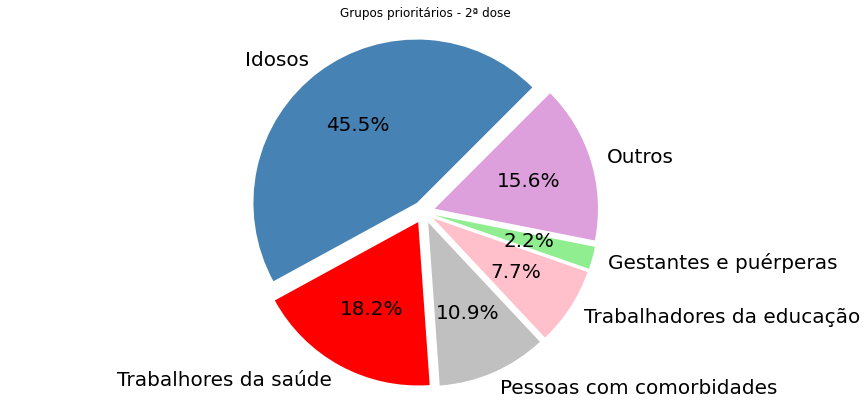

Número de vacinas aplicadas em idosos na segunda dose: 278579
Número de vacinas aplicadas em trabalhadores da saúde na segunda dose: 111317
Número de vacinas aplicadas em pessoas com comorbidades na segunda dose: 66539
Número de vacinas aplicadas em trabalhadores da educação na segunda dose: 47123
Número de vacinas aplicadas em gestantes e puérperas na segunda dose: 13601
Número de vacinas aplicadas em outros grupos prioritários na segunda dose: 95660


In [33]:
qtdidosos_2dose = data[idosos_2dose].count()[0]
qtdtrabalhores_saude_2dose = data[trabalhores_saude_2dose].count()[0]
qtdpessosas_comorbidade_2dose = data[pessosas_comorbidade_2dose].count()[0]
qtdtrabalhores_educacao_2dose = data[trabalhores_educacao_2dose].count()[0]
qtdgestantes_e_puerperas_2dose = data[gestantes_e_puerperas_2dose].count()[0]
qtdoutros_2dose = data[outros_2dose].count()[0]

valores = [qtdidosos_2dose, qtdtrabalhores_saude_2dose, qtdpessosas_comorbidade_2dose, qtdtrabalhores_educacao_2dose, qtdgestantes_e_puerperas_2dose, qtdoutros_2dose]
rotulos = ['Idosos','Trabalhores da saúde', 'Pessoas com comorbidades', 'Trabalhadores da educação', 'Gestantes e puérperas', 'Outros']

fig1, ax2 = plt.subplots(figsize=(15, 7))
plt.rcParams['xtick.labelsize'] = 20
wedges, texts, autotexts = ax2.pie(x=valores, labels=rotulos, autopct='%1.1f%%', shadow=False, startangle=45, colors = ['steelblue', 'red', 'silver', 'pink', 'lightgreen', 'plum'], explode=(0.07, 0.07, 0.07, 0.07, 0.07, 0.07))
plt.setp(autotexts,size=20)
plt.title('Grupos prioritários - 2ª dose')
ax2.axis('equal')
plt.show()
print(f'Número de vacinas aplicadas em idosos na segunda dose: {qtdidosos_2dose}')
print(f'Número de vacinas aplicadas em trabalhadores da saúde na segunda dose: {qtdtrabalhores_saude_2dose}')
print(f'Número de vacinas aplicadas em pessoas com comorbidades na segunda dose: {qtdpessosas_comorbidade_2dose}')
print(f'Número de vacinas aplicadas em trabalhadores da educação na segunda dose: {qtdtrabalhores_educacao_2dose}')
print(f'Número de vacinas aplicadas em gestantes e puérperas na segunda dose: {qtdgestantes_e_puerperas_2dose}')
print(f'Número de vacinas aplicadas em outros grupos prioritários na segunda dose: {qtdoutros_2dose}')

Na segunda dose da vacina os idosos continuam sendo a maioria dentre os prioritários. 

Divisão dos 5 grupos prioritários que mais tomaram vacinas e o restante dos grupos classificados como "outros" - 3ª dose

In [34]:
idosos_3dose = (data['grupo'] == 'IDOSOS')&(data['dose'] == 3)
trabalhores_saude_3dose = (data['grupo'] == 'TRABALHADORES DA SAÚDE')&(data['dose'] == 3)
pessosas_comorbidade_3dose = (data['grupo'] == 'PESSOAS COM COMORBIDADES')&(data['dose'] == 3)
trabalhores_educacao_3dose = (data['grupo'] == 'TRABALHADORES DA EDUCAÇÃO')&(data['dose'] == 3)
gestantes_e_puerperas_3dose = (data['grupo'] == 'GESTANTES E PUÉRPERAS')&(data['dose'] == 3)
outros_3dose = (data['grupo'] != 'IDOSOS')&(data['grupo'] != 'TRABALHADORES DA SAÚDE')&(data['grupo'] != 'PESSOAS COM COMORBIDADES')&(data['grupo'] != 'TRABALHADORES DA EDUCAÇÃO')&(data['grupo'] != 'GESTANTES E PUÉRPERAS')&(data['grupo']!='PÚBLICO EM GERAL (18 a 59 anos)') & (data['grupo']!='CRIANÇAS DE 05 A 11 ANOS') & (data['grupo']!='CRIANÇAS DE 03 E 04 ANOS') & (data['grupo']!='PÚBLICO EM GERAL - MENOR DE 18 ANOS')&(data['dose'] == 3)

Gráfico em pizza mostrando, em porcetagem, a quantidade de vacinas tomadas por grupos na terceira dose

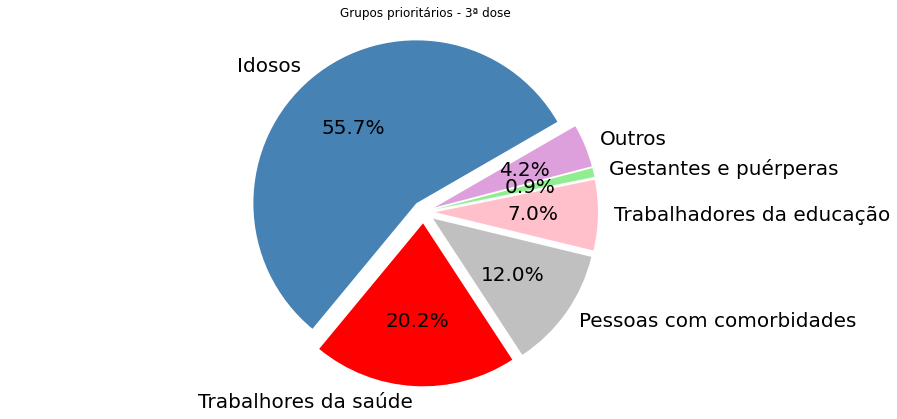

Número de vacinas aplicadas em idosos na terceira dose: 212516
Número de vacinas aplicadas em trabalhadores da saúde na terceira dose: 77231
Número de vacinas aplicadas em pessoas com comorbidades na terceira dose: 45788
Número de vacinas aplicadas em trabalhadores da educação na terceira dose: 26610
Número de vacinas aplicadas em gestantes e puérperas na terceira dose: 3406
Número de vacinas aplicadas em outros grupos prioritários na terceira dose: 16223


In [35]:
qtdidosos_3dose = data[idosos_3dose].count()[0]
qtdtrabalhores_saude_3dose = data[trabalhores_saude_3dose].count()[0]
qtdpessosas_comorbidade_3dose = data[pessosas_comorbidade_3dose].count()[0]
qtdtrabalhores_educacao_3dose = data[trabalhores_educacao_3dose].count()[0]
qtdgestantes_e_puerperas_3dose = data[gestantes_e_puerperas_3dose].count()[0]
qtdoutros_3dose = data[outros_3dose].count()[0]

valores = [qtdidosos_3dose, qtdtrabalhores_saude_3dose, qtdpessosas_comorbidade_3dose, qtdtrabalhores_educacao_3dose, qtdgestantes_e_puerperas_3dose, qtdoutros_3dose]
rotulos = ['Idosos','Trabalhores da saúde', 'Pessoas com comorbidades', 'Trabalhadores da educação', 'Gestantes e puérperas', 'Outros']

fig1, ax2 = plt.subplots(figsize=(15, 7))
plt.rcParams['xtick.labelsize'] = 20
wedges, texts, autotexts = ax2.pie(x=valores, labels=rotulos, autopct='%1.1f%%', shadow=False, startangle=30, colors = ['steelblue', 'red', 'silver', 'pink', 'lightgreen', 'plum'], explode=(0.07, 0.07, 0.07, 0.07, 0.07, 0.07))
plt.setp(autotexts,size=20)
plt.title('Grupos prioritários - 3ª dose')
ax2.axis('equal')
plt.show()
print(f'Número de vacinas aplicadas em idosos na terceira dose: {qtdidosos_3dose}')
print(f'Número de vacinas aplicadas em trabalhadores da saúde na terceira dose: {qtdtrabalhores_saude_3dose}')
print(f'Número de vacinas aplicadas em pessoas com comorbidades na terceira dose: {qtdpessosas_comorbidade_3dose}')
print(f'Número de vacinas aplicadas em trabalhadores da educação na terceira dose: {qtdtrabalhores_educacao_3dose}')
print(f'Número de vacinas aplicadas em gestantes e puérperas na terceira dose: {qtdgestantes_e_puerperas_3dose}')
print(f'Número de vacinas aplicadas em outros grupos prioritários na terceira dose: {qtdoutros_3dose}')

Na terceira dose houve uma redução significativa do número de vacinas aplicadas nos outros grupos prioritários. Dessa vez os idosos representam o grupo prioritário em mais da metade no número de vacinas tomadas.

Divisão dos 5 grupos prioritários que mais tomaram vacinas e o restante dos grupos classificados como "outros" - 4ª dose

In [36]:
pessosas_comorbidade_4dose = (data['grupo'] == 'PESSOAS COM COMORBIDADES')&(data['dose'] == 4)
outros_4dose = (data['grupo'] != 'PESSOAS COM COMORBIDADES')&(data['grupo']!='PÚBLICO EM GERAL (18 a 59 anos)') & (data['grupo']!='CRIANÇAS DE 05 A 11 ANOS') & (data['grupo']!='CRIANÇAS DE 03 E 04 ANOS') & (data['grupo']!='PÚBLICO EM GERAL - MENOR DE 18 ANOS')&(data['dose'] == 4)

Gráfico em pizza mostrando, em porcetagem, a quantidade de vacinas tomadas por grupos na quarta dose

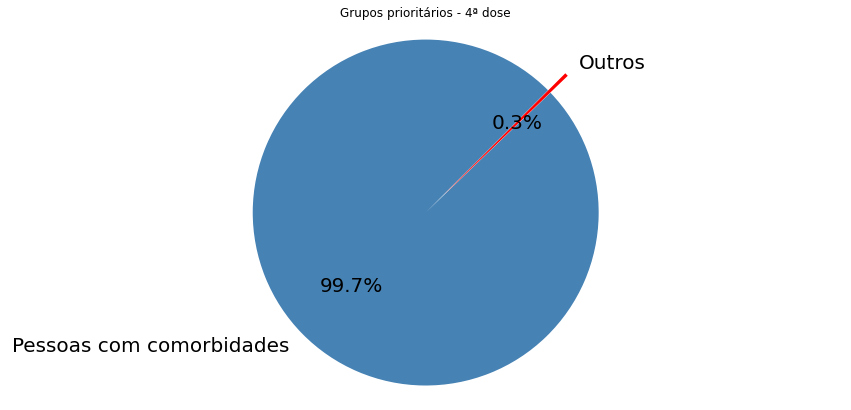

Número de vacinas aplicadas em pessoas com comorbidades na quarta dose: 926
Número de vacinas aplicadas em outros grupos prioritários na quarta dose: 3


In [37]:
qtdpessosas_comorbidade_4dose = data[pessosas_comorbidade_4dose].count()[0]
qtdoutros_4dose = data[outros_4dose].count()[0]

valores = [ qtdpessosas_comorbidade_4dose, qtdoutros_4dose]
rotulos = ['Pessoas com comorbidades', 'Outros']

fig1, ax2 = plt.subplots(figsize=(15, 7))
plt.rcParams['xtick.labelsize'] = 20
wedges, texts, autotexts = ax2.pie(x=valores, labels=rotulos, autopct='%1.1f%%', shadow=False, startangle=45, colors = ['steelblue', 'red'], explode=(0.07, 0.07))
plt.setp(autotexts,size=20)
plt.title('Grupos prioritários - 4ª dose')
ax2.axis('equal')
plt.show()
print(f'Número de vacinas aplicadas em pessoas com comorbidades na quarta dose: {qtdpessosas_comorbidade_4dose}')
print(f'Número de vacinas aplicadas em outros grupos prioritários na quarta dose: {qtdoutros_4dose}')

Como na quarta dose houve uma redução significativa do número de vacinas aplicadas, então se foi divido em apenas dois, o de pessoas com comorbidades, no qual foi o grupo de prioritários que mais tomou vacina, e o restante em "outros".

Na quarta dose, o grupo de pessoas com comorbidades representa o grupo prioritário em quase 100%. 

# Conclusão

Conclui-se, então, a significativa redução de vacinas aplicadas conforme a progressão das doses. O que pode ser explicado pela impressão da diminuição da contaminação do vírus depois da imunização que a primeira e segunda dose garatiram, ocasionando, dessa forma, mais flexibilidade nos cuidados contra a covid-19.